**Compare Housing Prices: San Francisco, Denver, and Detroit**

The cities of San Francisco, Denver, and Detroit had three very different responses to the 2007 housing crisis.  In this Kaggle Kernel we explore how regional real estate markets were differentially impacted by the nationwide downturn in real estate prices.

*Step 1: Load Data*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

state_data = '../input/State_time_series.csv'
df=pd.read_csv(state_data)
city_data = '../input/City_time_series.csv'
dfCity = pd.read_csv(city_data)
State_house = pd.read_csv("../input/State_time_series.csv", parse_dates=['Date'])

States = ['California','Colorado','Michigan']
newdf = df.loc[df['RegionName'].isin(States)]
newdf.Date = pd.to_datetime(newdf.Date)
newdf2 = newdf.loc[newdf['Date'].dt.year == 2016]
newdf3 = df.loc[df['RegionName'] == 'California']
newdf4 = df.loc[df['RegionName'] == 'Colorado']
newdf5 = df.loc[df['RegionName'] == 'Michigan']
newdf6 = dfCity.loc[dfCity['RegionName'] == 'san_franciscosan_franciscoca']
newdf6.Date = pd.to_datetime(newdf6.Date)
newdf7 = dfCity.loc[dfCity['RegionName'] == 'denverdenverco']
newdf7.Date = pd.to_datetime(newdf7.Date)
newdf8 = dfCity.loc[dfCity['RegionName'] == 'detroitwaynemi']
newdf8.Date = pd.to_datetime(newdf8.Date)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


*Step 2: Visualize Distribution of Housing Prices in California, Colorado, and Michigan*

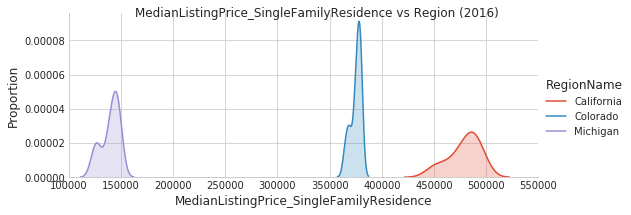

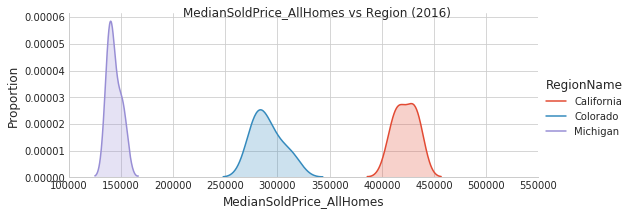

In [2]:
def plotDistribution(data,metric):
    """ Plot distributions """  
    sns.set_style("whitegrid")
    distributionTwo = sns.FacetGrid(data, hue='RegionName',aspect=2.5)
    distributionTwo.map(sns.kdeplot,metric,shade=True)
    distributionTwo.set(xlim=(100000, 550000))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels(str(metric), 'Proportion')
    distributionTwo.fig.suptitle(str(metric)+' vs Region (2016)')
plotDistribution(newdf2, 'MedianListingPrice_SingleFamilyResidence')
plotDistribution(newdf2, 'MedianSoldPrice_AllHomes')

The previous function produced two graphs (above).  The first (top) graph illustrates the distribution of prices for detached single family homes while the second (bottom) graph illustrates the distribution of prices for all homes including condominiums.  Both graphs rely on data from the year 2016 only.

These graphs illustrate that homes in Michigan are much more affordable than homes in either Colorado or California.  I suspect that cold weather and a lack of jobs prevents people from purchasing expensive homes in Michigan despite the fact that many of these homes are located on some the best and cleanest beaches in America.  Conversely, these graphs illustrate that homes in California are much more expensive than homes in either Michigan or Colorado.  Interestingly, you can see that there is a very large gap between the price of a detached single family home and the price of all homes (including condominiums) in Colorado.  I suspect that this is because Colorado has an over-supply of condominums and an under-supply of detached single family homes.  

Next we will explore the change in housing prices over time for each of these three regions, and we will pay particular attention to how each region responded to the 2007 housing crisis.

*Step 3: Plot Price Over Time for California, Colorado, and Michigan*

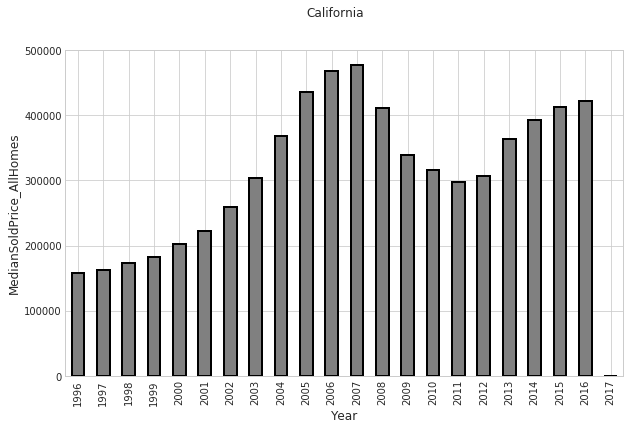

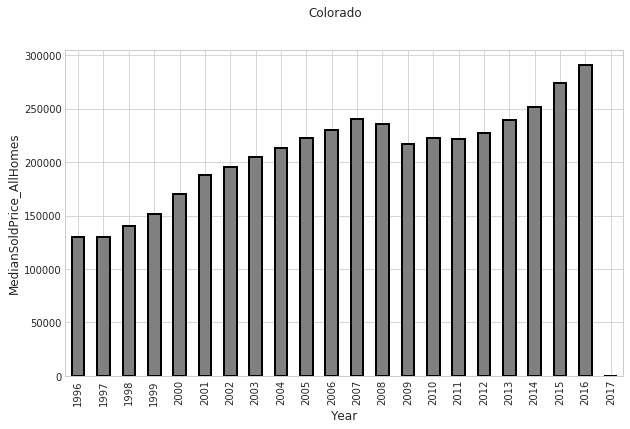

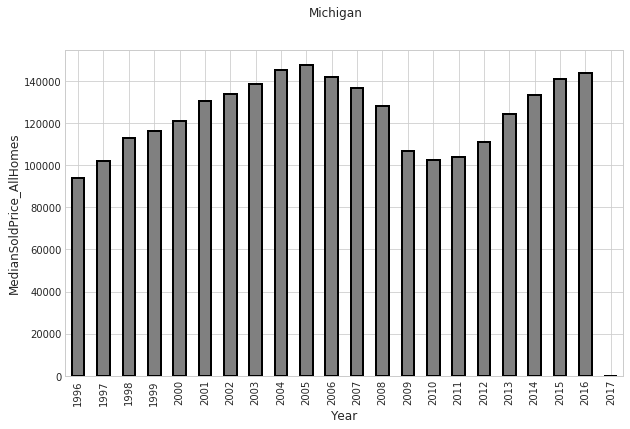

In [3]:
def priceOverTime(data,label):
    """Plot price over time"""
    data.groupby(newdf.Date.dt.year)['MedianSoldPrice_AllHomes'].mean().plot(kind='bar', figsize=(10, 6), color='grey', edgecolor = 'black', linewidth = 2)
    plt.suptitle(label, fontsize=12)
    plt.ylabel('MedianSoldPrice_AllHomes')
    plt.xlabel('Year')
    plt.show()    
priceOverTime(newdf3, "California")
priceOverTime(newdf4, "Colorado")
priceOverTime(newdf5, "Michigan")

The previous function produced three graphs (above).  Each graph illustrates the change in housing prices over time (for all homes including condominiums) from 1996 to 2016 for either California, Colorado, or Michigan.

The real estate markets in both California and Michigan were impacted dramatically by the downturn in housing prices that began in 2007.  Both markets have since recovered but the overall prices are still much lower than they would have been if growth had remained constant from 2007 until 2013.  Interestingly, Colorado's market was largely unaffected by the 2007 housing crisis.  I suspect that this is because Colorado was experiencing a period of net migration and job growth in the tech sector during this time period whereas California and Michigan had economies that were either mature (California) or in decline (Michigan).  

One major factor that influences regional real estate trends is the performance of important metropolitan areas.  Next, we will explore the performance of the most important metropolitan areas in California, Colorado, and Michigan.

*Step 4: Plot Price Over Time for San Francisco, Denver, and Detroit*

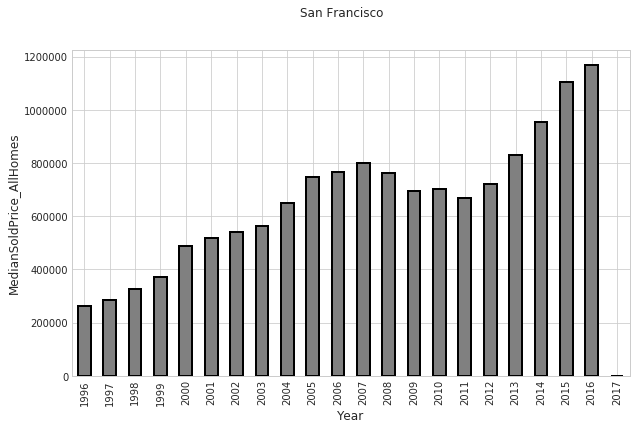

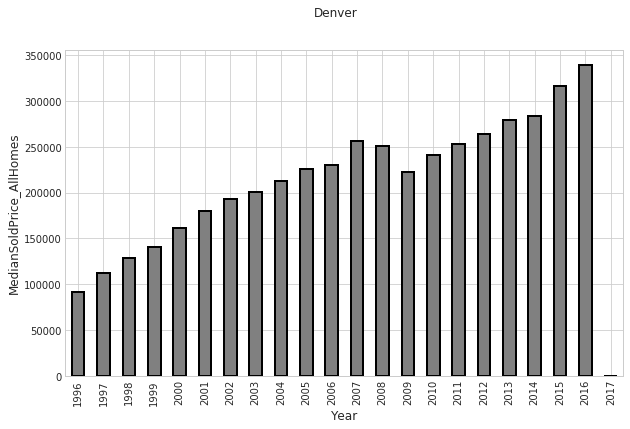

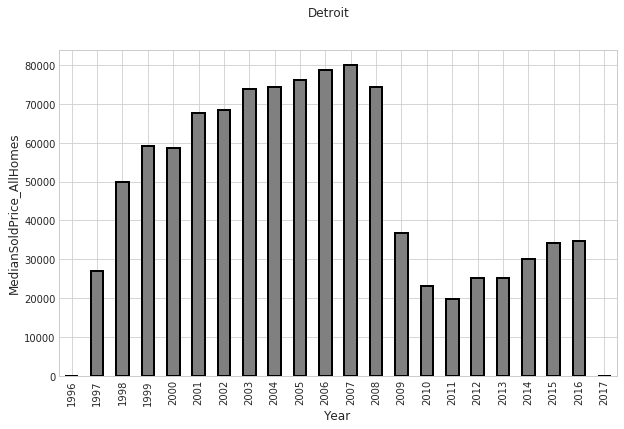

In [4]:
def priceOverTime2(data,label):
    data.groupby(data.Date.dt.year)['MedianSoldPrice_AllHomes'].mean().plot(kind='bar', figsize=(10, 6), color='grey', edgecolor = 'black', linewidth = 2)
    plt.suptitle(label, fontsize=12)
    plt.ylabel('MedianSoldPrice_AllHomes')
    plt.xlabel('Year')
    plt.show()
priceOverTime2(newdf6,'San Francisco')
priceOverTime2(newdf7,'Denver')
priceOverTime2(newdf8,'Detroit')

The previous function produced three graphs (above).  Each graph illustrates the change in housing prices over time (for all homes including condominiums) from 1996 to 2016 for either San Francisco, Denver, or Detroit.

The cities of San Francisco, Denver, and Detroit had three very different responses to the 2007 housing crisis.  In San Francisco, I suspect that many people saw the collapse in housing prices as an investment opportunity.  When the recession ended in 2012 real estate prices in San Francisco began increasing at their fastest rate in decades!  This contrasts the response of Detroit which never recovered from the drop in housing prices that occured in 2008.  I suspect that Detroit never recovered because additional factors (such as the decline of manufacturing capabilities in America) were also damaging its economy.  Finally, it appears as if homeowners in Denver never even noticed the effects of the recession.

In the previous analysis we demonstrated that California and Colorado both had a particularly strong recovery following the 2007 housing crisis.  Next, we will compare this response to the nationwide trend.

*Step 5: Compare Real Estate Recovery Rates for Every State in America*

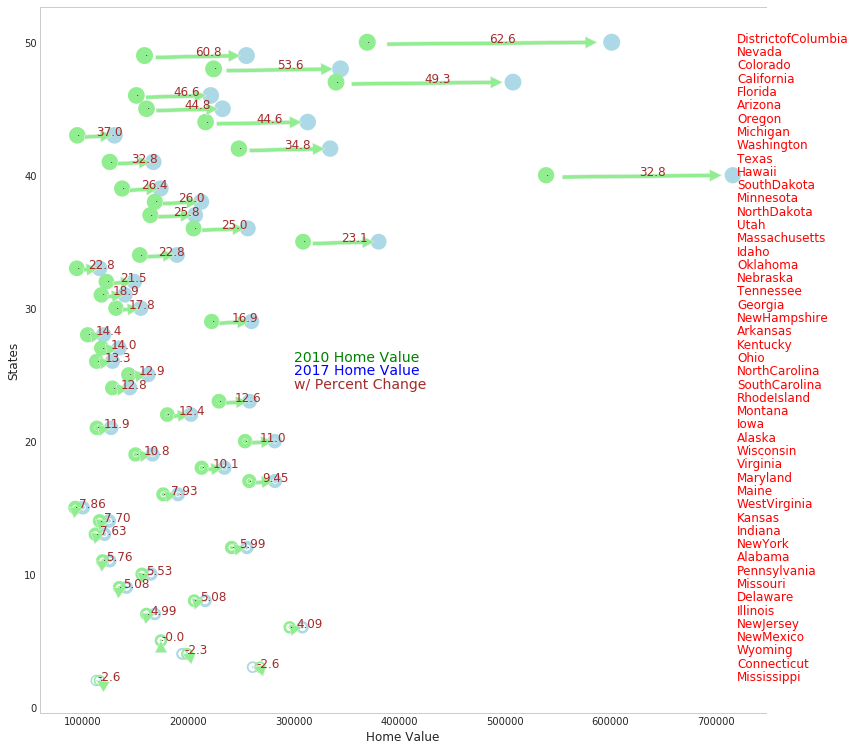

In [5]:
# The following code is a modified version of a snippet from https://www.kaggle.com/shelars1985/zillow-market-overview

State_raw_house = State_house.groupby(['RegionName', State_house.Date.dt.year])['ZHVI_SingleFamilyResidence'].mean().unstack()
State_raw_house.columns.name = None      
State_raw_house = State_raw_house.reset_index()  
State_raw_house = State_raw_house[['RegionName',2010,2011,2012,2013,2014,2015,2016,2017]]
State_raw_house = State_raw_house.dropna()
Feature = State_raw_house['RegionName']
weightage = State_raw_house[2010]
total = State_raw_house[2017]
percent =  ((State_raw_house[2017] - State_raw_house[2010]) /State_raw_house[2010])*100
mid_pos = (State_raw_house[2010] + State_raw_house[2017]) / 2
weightage = np.array(weightage)
Feature = np.array(Feature)
total = np.array(total)
percent = np.array(percent)
mid_pos  = np.array(mid_pos)

idx = percent.argsort()
Feature, total, percent, mid_pos, weightage = [np.take(x, idx) for x in [Feature, total, percent, mid_pos , weightage]]

s = 1
size=[]
for i, cn in enumerate(weightage):
     s = s + 1        
     size.append(s)
    
fig, ax = plt.subplots(figsize=(13, 13))
ax.scatter(total,size,marker="o", color="lightBlue", s=size, linewidths=10)
ax.scatter(weightage,size,marker="o", color="LightGreen", s=size, linewidths=10)
ax.set_xlabel('Home Value')
ax.set_ylabel('States')
ax.spines['right'].set_visible(False)
ax.grid()

for i, txt in enumerate(Feature):
      ax.annotate(txt, (720000,size[i]),fontsize=12,rotation=0,color='Red')
      ax.annotate('.', xy=(total[i], size[i]), xytext=(weightage[i], size[i]),
            arrowprops=dict(facecolor='LightGreen', shrink=0.06),
            )
for i, pct in enumerate(percent):
     ax.annotate(str(pct)[0:4], (mid_pos[i],size[i]),fontsize=12,rotation=0,color='Brown')

ax.annotate('2010 Home Value', (300000,26),fontsize=14,rotation=0,color='Green')
ax.annotate('2017 Home Value', (300000,25),fontsize=14,rotation=0,color='Blue');

ax.annotate('w/ Percent Change', (300000,24),fontsize=14,rotation=0,color='Brown');

These results confirm that Colorado and California had two of the strongest real estate markets in America following the 2007 housing crisis.  Surprisingly, Michigan had a strong recovery as well despite there being no recovery at all in the city of Detroit.  It would be interesting to compare this response to the response from regions such as Nevada and Washington DC which also experienced rapid growth!